<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  importing the usefull liabaries
import tensorflow as tf
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Downloding our dataset
!wget https://gist.githubusercontent.com/amilavm/f9d370b96e893206688117532328f21e/raw/7409cf368c1d71e63a2fcbe1095d0117205f54d3/intents.json

--2022-09-10 10:04:40--  https://gist.githubusercontent.com/amilavm/f9d370b96e893206688117532328f21e/raw/7409cf368c1d71e63a2fcbe1095d0117205f54d3/intents.json
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1907 (1.9K) [text/plain]
Saving to: ‘intents.json.4’

intents.json.4      100%[===================>]   1.86K  --.-KB/s    in 0s      

2022-09-10 10:04:40 (37.9 MB/s) - ‘intents.json.4’ saved [1907/1907]



In [ ]:
data= open("/content/intents.json")

chatbot_data= json.load(data)

In [ ]:
chatbot_data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Hay'],
   'responses': ['Hello', 'Hi', 'Hi there']},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later', 'Have a nice day', 'Bye! Come back again']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Thanks for the help'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    "You're most welcome!"]},
  {'tag': 'about',
   'patterns': ['Who are you?', 'What are you?', 'Who you are?'],
   'responses': ['I.m Joana, your bot assistant',
    "I'm Joana, an Artificial Intelligent bot"]},
  {'tag': 'name',
   'patterns': ['what is your name',
    'what should I call you',
    'whats your name?'],
   'responses': ['You can call me Joana.',
    "I'm Joana!",
    'Just call me as Joana']},
  {'tag': 'help',
   'patterns': ['Could you help me?',
    'give me a hand please',
    'Can you help

In [ ]:
# Getting all data to a list
tag= []
patterns= []
responses= {}

for intent in chatbot_data["intents"]:
  responses[intent["tag"]]= intent["responses"]
  for lines in intent["patterns"]:
    patterns.append(lines)
    tag.append(intent["tag"])



In [ ]:
chatbot_df= pd.DataFrame({"inputs": patterns,
                          "tags": tag})


chatbot_df

,inputs,tags
0,Hi,greeting
1,Hey,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Hay,greeting
5,Bye,goodbye
6,See you later,goodbye
7,Goodbye,goodbye
8,Thanks,thanks
9,Thank you,thanks


In [ ]:
# Let shuffle our data set
chatbot_df= chatbot_df.sample(frac=1, random_state=42)
chatbot_df

,inputs,tags
31,I want to raise a complaint,complaint
15,what is your name,name
26,how to open a new account,createaccount
17,whats your name?,name
8,Thanks,thanks
9,Thank you,thanks
19,give me a hand please,help
21,What can you do for me?,help
12,Who are you?,about
0,Hi,greeting


In [ ]:
# Let visualise our tags
chatbot_df["tags"].value_counts()

help             7
createaccount    5
greeting         5
thanks           4
complaint        3
name             3
about            3
goodbye          3
Name: tags, dtype: int64

In [ ]:
# let create our train_sentence
train_sentence= chatbot_df.inputs.to_list()
train_sentence

['I want to raise a complaint',
 'what is your name',
 'how to open a new account',
 'whats your name?',
 'Thanks',
 'Thank you',
 'give me a hand please',
 'What can you do for me?',
 'Who are you?',
 'Hi',
 'Hay',
 'what should I call you',
 'Bye',
 'What are you?',
 'Thanks for the help',
 'support me please',
 'Hey',
 'Is anyone there?',
 'how to open a new account',
 'Hello',
 'I want to create an account',
 'I need a help',
 'have a complaint',
 'I need a support',
 'Could you help me?',
 'I need to create a new account',
 'See you later',
 'Can you help?',
 'there is a complaint about a service',
 'Goodbye',
 "That's helpful",
 'Who you are?',
 'can you create an account for me']

In [ ]:
sentence_lenght= [len(sentence.split()) for sentence in train_sentence]
total_sentence_len= np.sum(sentence_lenght)
mean_sentence= np.mean(sentence_lenght)

total_sentence_len, mean_sentence

(119, 3.606060606060606)

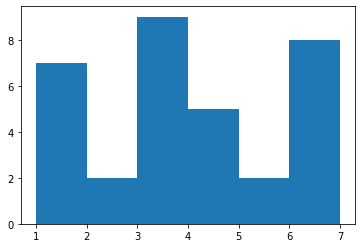

In [ ]:
# Let have a visual of our sentence distribution
plt.hist(sentence_lenght, bins=6);

In [ ]:
# Let check the 95 persentile
output_dim = int(np.percentile(sentence_lenght, 95))
output_dim

7

In [ ]:
from tensorflow.keras.layers import TextVectorization


In [ ]:
max_tokens= 100
text_vectorizer= TextVectorization(max_tokens= max_tokens,
                                   output_sequence_length=output_dim,
                                   name= "text_vectotion_layer")
text_vectorizer

text_vectorizer.adapt(train_sentence)

In [ ]:
# Let test our text_vectorizer layer with a random sentence
import random

random_sentence= random.choice(train_sentence)
vector_random_sentence= text_vectorizer([random_sentence])

print(f"Random sentence before passing it into our text vectorization layer:\n {random_sentence}\n")
print(f"Random sentence after passing it into our text vectorization layer:\n {vector_random_sentence}\n")
print(f"Shape of random sentence after passing it through our text vectorizer layer:\n {vector_random_sentence.shape} ")

Random sentence before passing it into our text vectorization layer:
 Thanks

Random sentence after passing it into our text vectorization layer:
 [[22  0  0  0  0  0  0]]

Shape of random sentence after passing it through our text vectorizer layer:
 (1, 7) 


In [ ]:
# Let get the words in our vocabulary
words_in_vocab= text_vectorizer.get_vocabulary()
print(f"Lenght of words in vocab: {len(words_in_vocab)}")
print(f"Five most common words: {words_in_vocab[:5]}")
print(f"Five least common words: {words_in_vocab[-5:]}")

Lenght of words in vocab: 53
Five most common words: ['', '[UNK]', 'you', 'a', 'i']
Five least common words: ['could', 'call', 'bye', 'anyone', 'about']


### Creating text embeddings

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
text_embeddings= Embedding(input_dim= len(words_in_vocab),
                           output_dim=25,
                           name="embedding_layer")

text_embeddings

In [ ]:
# Let test our text_embeddings layer with a random sentence
import random

random_sentence= random.choice(train_sentence)
vector_random_sentence= text_vectorizer(random_sentence)
embed_random_sentence= text_embeddings(vector_random_sentence)

print(f"Random sentence before passing it into our text vectorization layer:\n {random_sentence}\n")
print(f"Random sentence after passing it into our text vectorization layer:\n {vector_random_sentence}\n")
print(f"Random sentence after passing it into our embedding layer {embed_random_sentence} ")
print(f"Shape of random sentence after passing it through our embedding vectorizer layer:\n {embed_random_sentence.shape} ")

Random sentence before passing it into our text vectorization layer:
 Hay

Random sentence after passing it into our text vectorization layer:
 [42  0  0  0  0  0  0]

Random sentence after passing it into our embedding layer [[-0.02353491 -0.0385123   0.00823892  0.0461805  -0.03305069  0.01107825
  -0.03166462 -0.00413181  0.04467786 -0.0077366  -0.01007508 -0.01755737
  -0.04400023  0.04642148  0.00057631  0.03708215 -0.03164832  0.01567806
  -0.0067568  -0.02812144  0.02762319  0.02498946  0.04034338  0.00920735
  -0.04291878]
 [ 0.00190721 -0.04865251 -0.02255201 -0.04870801  0.0445462   0.02699569
   0.03972392 -0.01364066 -0.03154416 -0.01279919  0.0260357   0.00536419
  -0.02900374 -0.00134749 -0.01198221  0.04879628  0.04765952 -0.03981858
  -0.00561687 -0.0339533  -0.04416419  0.01937331 -0.02959957 -0.01261692
   0.02596429]
 [ 0.00190721 -0.04865251 -0.02255201 -0.04870801  0.0445462   0.02699569
   0.03972392 -0.01364066 -0.03154416 -0.01279919  0.0260357   0.00536419
  -0

In [ ]:
embed_random_sentence[0], embed_random_sentence[0].shape

(<tf.Tensor: shape=(25,), dtype=float32, numpy=
 array([-0.02353491, -0.0385123 ,  0.00823892,  0.0461805 , -0.03305069,
         0.01107825, -0.03166462, -0.00413181,  0.04467786, -0.0077366 ,
        -0.01007508, -0.01755737, -0.04400023,  0.04642148,  0.00057631,
         0.03708215, -0.03164832,  0.01567806, -0.0067568 , -0.02812144,
         0.02762319,  0.02498946,  0.04034338,  0.00920735, -0.04291878],
       dtype=float32)>, TensorShape([25]))

### Prepeocessing our labels

In [ ]:
charbot_df.head()

,inputs,tags
31,I want to raise a complaint,complaint
15,what is your name,name
26,how to open a new account,createaccount
17,whats your name?,name
8,Thanks,thanks


In [ ]:
# Let label encode our labels (tag)
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder= LabelEncoder()

train_label_label_encode= label_encoder.fit_transform(chatbot_df.tags)
train_label_label_encode

array([1, 6, 2, 6, 7, 7, 5, 5, 0, 4, 4, 6, 3, 0, 7, 5, 4, 4, 2, 4, 2, 5,
       1, 5, 5, 2, 3, 5, 1, 3, 7, 0, 2])

In [ ]:
class_names= label_encoder.classes_
num_classes= len(label_encoder.classes_)

class_names, num_classes

(array(['about', 'complaint', 'createaccount', 'goodbye', 'greeting',
        'help', 'name', 'thanks'], dtype=object), 8)

In [ ]:
# Let see the representation of our label encode class
label_encoder.inverse_transform([0, 1, 2, 3, 4 ,5 ,6, 7])

array(['about', 'complaint', 'createaccount', 'goodbye', 'greeting',
       'help', 'name', 'thanks'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Let one oht encode our label
one_hot_encoder= OneHotEncoder(sparse=False)
train_label_one_hot= one_hot_encoder.fit_transform(chatbot_df.tags.to_numpy().reshape(-1, 1))
train_label_one_hot

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 

In [ ]:
train_label_one_hot.shape

(33, 8)

## Building our model


In [ ]:
from tensorflow.keras import layers

In [ ]:
input_layer= layers.Input(shape=(1, ), dtype= tf.string, name="input_layer")
vectorization_layer= text_vectorizer(input_layer)
embedding_layer= text_embeddings(vectorization_layer)
x= layers.LSTM(512, activation="tanh", return_sequences=False)(embedding_layer)
# x= layers.LSTM(512, activation="tanh", return_sequences=True)(x)
# x= layers.LSTM(512, activation="tanh")(x)
# x= layers.GlobalMaxPool1D()(x)
x= layers.Dense(10, activation="relu")(x)
output_layer= layers.Dense(num_classes, activation="softmax", name= "output_layer")(x)

model= tf.keras.Model(inputs= input_layer,
                      outputs= output_layer,
                      name="chatbot_model")

In [ ]:
# Let get the summary of our model
model.summary()

Model: "chatbot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectotion_layer (TextV  (None, 7)                0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding)  (None, 7, 25)            1325      
                                                                 
 lstm_22 (LSTM)              (None, 512)               1101824   
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
 output_layer (Dense)        (None, 8)                 88        
                                                     

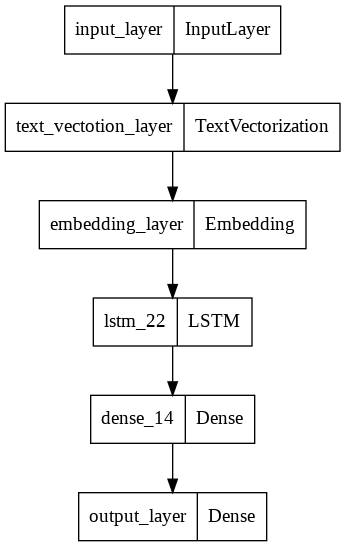

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
# Let compile our model
model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

### Setting up callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop= EarlyStopping(monitor="accuracy",
                          patience=3,
                          verbose=1,
                          )

In [ ]:
# Let create a tensorflow data set
train_data= tf.data.Dataset.from_tensor_slices((train_sentence, train_label_one_hot)).batch(8).prefetch(tf.data.AUTOTUNE)
print(train_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 8), dtype=tf.float64, name=None))>


In [ ]:
# Let fit out model

#i ran this cell three times, so it like continue from where the last epochs left off
history_model= model.fit(train_data,
                         epochs=15,
                         callbacks= [early_stop])

Epoch 1/15
5/5 [==============================] - 2s 55ms/step - loss: 2.0786 - accuracy: 0.2121
Epoch 2/15
5/5 [==============================] - 0s 46ms/step - loss: 2.0626 - accuracy: 0.2424
Epoch 3/15
5/5 [==============================] - 0s 45ms/step - loss: 2.0293 - accuracy: 0.1818
Epoch 4/15
5/5 [==============================] - 0s 48ms/step - loss: 1.9685 - accuracy: 0.1818
Epoch 5/15
5/5 [==============================] - 0s 48ms/step - loss: 1.9082 - accuracy: 0.3030
Epoch 6/15
5/5 [==============================] - 0s 48ms/step - loss: 1.7550 - accuracy: 0.3333
Epoch 7/15
5/5 [==============================] - 0s 46ms/step - loss: 1.6615 - accuracy: 0.3333
Epoch 8/15
5/5 [==============================] - 0s 49ms/step - loss: 1.5982 - accuracy: 0.3939
Epoch 9/15
5/5 [==============================] - 0s 47ms/step - loss: 1.5228 - accuracy: 0.3939
Epoch 10/15
5/5 [==============================] - 0s 47ms/step - loss: 1.3246 - accuracy: 0.5152
Epoch 11/15
5/5 [============

Wow, close we have 100% accuracy

In [ ]:
# let evaluate our model
model.evaluate(train_data)

5/5 [==============================] - 1s 9ms/step - loss: 0.8278 - accuracy: 0.6061


[0.8277987241744995, 0.6060606241226196]

In [ ]:
chatbot_df.head()

,inputs,tags
31,I want to raise a complaint,complaint
15,what is your name,name
26,how to open a new account,createaccount
17,whats your name?,name
8,Thanks,thanks


In [ ]:
# Let text our model
sentence= ["account problem"]
sen_pred= model.predict(sentence)
preds= np.argmax(sen_pred, axis= 1)
preds

array([5])

In [ ]:
class_names

array(['about', 'complaint', 'createaccount', 'goodbye', 'greeting',
       'help', 'name', 'thanks'], dtype=object)

In [ ]:
tag_predicted= class_names[preds]
tag_predicted

array(['help'], dtype=object)

In [ ]:
# let make read predictions
print(f"Hello my name is Sam and I'm a chatbot")
print("How may I help you: ")
while True:

  predict_input= input("YOU :  ")

  input_preds= model.predict([predict_input])
  preds= np.argmax(input_preds)
  
  if predict_input != "goodbye":
    # Finding the predicton tag
    tag_predicted= class_names[preds]
    print("Sam :", random.choice(responses[tag_predicted]))
  elif predict_input == "goodbye":
    print(f"Goodbye, see you next time")
    break


Hello my name is Sam and I'm a chatbot
How may I help you: 
YOU :  hi
Sam : Hi there
YOU :  i need your help
Sam : Yes Sure, How can I support you
YOU :  i want to create an account
Sam : Just go to our web site and follow the guidelines to create a new account
YOU :  ok, thanks
Sam : See you later
YOU :  goodbye
Goodbye, see you next time
